In [81]:
import pandas as pd

df = pd.read_csv('output_15.tsv', sep='\t')
df_mix = pd.read_csv('output_21.tsv', sep='\t')

In [11]:
df.head()

,key,consensus_value,homopolymer_length,consensus_count,neighbor_count,total_count,SUBSTITUTION(AC),SUBSTITUTION(AG),SUBSTITUTION(AT),SUBSTITUTION(GA),...,SUBSTITUTION(TG),INSERTION(A),INSERTION(C),INSERTION(G),INSERTION(T),DELETION(A),DELETION(C),DELETION(G),DELETION(T),AMBIGUOUS
0,CTGAAACTGACTGAACTAATT,GAGTCA,2,11,0,11,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CGGCCTGCTGGATGGGTATTT,CCACCA,3,13,1,14,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,CGTTTATGTCCCTGGTGGTGT,CGTTGT,2,6,0,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CCAGCAATGCACGGGTTAACC,GCTTGC,2,10,0,10,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,GCAAAAATCGGCAACATCAAA,TACAAC,3,6,0,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df['SUBSTITUTION'] = df[[col for col in df.columns if col.startswith('SUBSTITUTION')]].sum(axis=1)
df['INSERTION'] = df[[col for col in df.columns if col.startswith('INSERTION')]].sum(axis=1)
df['DELETION'] = df[[col for col in df.columns if col.startswith('DELETION')]].sum(axis=1)

In [18]:
df['non_substitution_neighbors'] = df['neighbor_count'] + df['consensus_count'] - df['SUBSTITUTION']

In [62]:
df['ratio'] = df['neighbor_count'] / df['consensus_count']

In [59]:
df[df["ratio"] > 1]

,Key,Consensus_Value,Consensus_Count,Error_Count,Total_Count,Homopolymer_Length,ratio
9,TTTTGTTACGACCAAAGCCAT,ATCCCG,4,10,21,3,2.500000
11,CTGTTCCTGCCATTATGCCAA,ACCCGA,17,22,50,3,1.294118
14,GCTTGAAAATCATTTTCTTCC,CCCGTG,26,34,81,5,1.307692
15,CATACTATTTTTTGGTGAAAA,ATGTTC,9,11,25,5,1.222222
16,CGGAGCAGCTGCAAGCTTTAT,ACGACA,25,28,60,1,1.120000
...,...,...,...,...,...,...,...
3959,AAAACAAAGGTCAGCAAAACG,AAAGAT,48,53,110,3,1.104167
3961,TCCCATGAAACATAAACAACT,GCGGCA,30,31,71,2,1.033333
3966,CCTCAAAAACCGACAAACGCA,GCGGCG,8,11,21,2,1.375000
3969,ATAAATATACTAATCATGTAA,GCCATC,19,22,51,2,1.157895


In [1]:
avg_ratio

NameError: name 'avg_ratio' is not defined

In [29]:
df[df["Homopolymer_Length"] == 12]

,Key,Consensus_Value,Consensus_Count,Error_Count,Total_Count,Homopolymer_Length,ratio,pred
19072,AAATCAAATGTTTTTTTTTTT,TGCTGA,4,3,21,12,0.75,0.837364


In [54]:
df[df["Total_Count"] > 50]["ratio"].median() / 6

0.03021175611537057

In [55]:
len(df[df["Total_Count"] > 50])

96

/tmp/ipykernel_2312/2814973263.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df["pred"] = model.predict(temp_df[["consensus_count"]])


<Axes: xlabel='consensus_count', ylabel='ratio'>

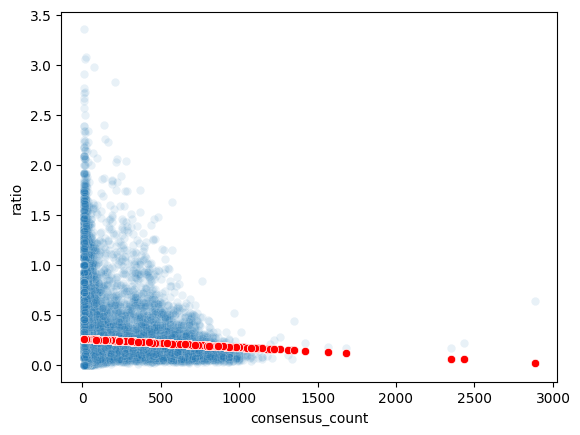

In [27]:
# Linear regression of Error_Count ~ Consensus_Count

from sklearn.linear_model import LinearRegression, QuantileRegressor
import matplotlib.pyplot as plt
import seaborn as sns

temp_df = df[df["consensus_count"] > 10]
y = temp_df["ratio"]

model = LinearRegression(fit_intercept=True)
model.fit(temp_df[["consensus_count"]], y)
temp_df["pred"] = model.predict(temp_df[["consensus_count"]])
sns.scatterplot(data=temp_df, x="consensus_count", y=y, alpha=0.1)
sns.scatterplot(data=temp_df, x="consensus_count", y="pred", color='red')


/tmp/ipykernel_3524/1118634482.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df["pred"] = model.predict(temp_df[["consensus_count"]])


<Axes: xlabel='consensus_count', ylabel='neighbor_count'>

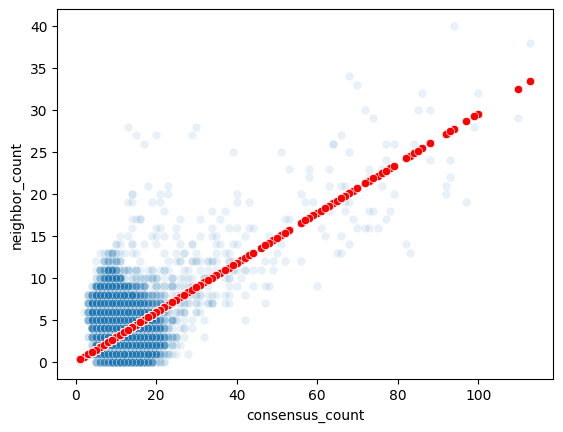

In [5]:
temp_df = df_mix[df_mix["total_count"] > 10]
y = temp_df["neighbor_count"]

model = LinearRegression(fit_intercept=False)
model.fit(temp_df[["consensus_count"]], y)
temp_df["pred"] = model.predict(temp_df[["consensus_count"]])
sns.scatterplot(data=temp_df, x="consensus_count", y=y, alpha=0.1)
sns.scatterplot(data=temp_df, x="consensus_count", y="pred", color='red')

(0.0, 1.0)

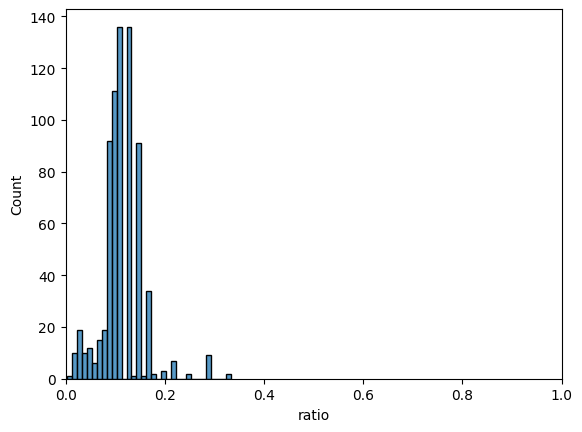

In [94]:
temp_df = df

target = "SUBSTITUTION(AC)"
temp_df["other_count"] = temp_df["consensus_count"] + temp_df["neighbor_count"] - temp_df[target]
temp_df["ratio"] = temp_df[target] / temp_df["other_count"]

sns.histplot(data=temp_df[temp_df["ratio"] > 0], x="ratio", binwidth=0.01)
plt.xlim(0, 1)

/tmp/ipykernel_2312/916594013.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df["other_count"] = temp_df["consensus_count"] + temp_df["neighbor_count"] - temp_df[target]
/tmp/ipykernel_2312/916594013.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df["ratio"] = temp_df[target] / temp_df["other_count"]


(0.0, 1.0)

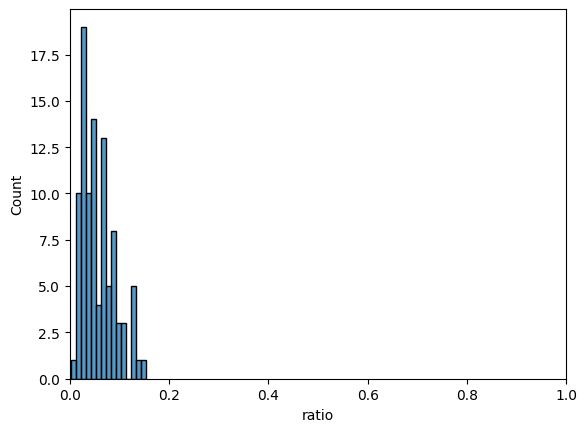

In [100]:
temp_df = df[df["total_count"] > 15]

target = "SUBSTITUTION(AC)"
temp_df["other_count"] = temp_df["consensus_count"] + temp_df["neighbor_count"] - temp_df[target]
temp_df["ratio"] = temp_df[target] / temp_df["other_count"]

sns.histplot(data=temp_df[temp_df["ratio"] > 0], x="ratio", binwidth=0.01)
plt.xlim(0, 1)

/tmp/ipykernel_2312/4272072047.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df["other_count"] = temp_df["consensus_count"] + temp_df["neighbor_count"] - temp_df[target]
/tmp/ipykernel_2312/4272072047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df["ratio"] = temp_df[target] / temp_df["other_count"]


(0.0, 1.0)

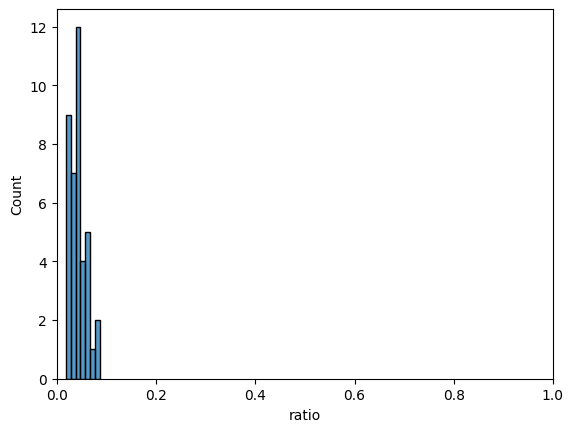

In [99]:
temp_df = df_mix[df_mix["consensus_count"] > 10]

target = "SUBSTITUTION(AC)"
temp_df["other_count"] = temp_df["consensus_count"] + temp_df["neighbor_count"] - temp_df[target]
temp_df["ratio"] = temp_df[target] / temp_df["other_count"]

sns.histplot(data=temp_df[temp_df["ratio"] > 0], x="ratio", binwidth=0.01)
plt.xlim(0, 1)

/home/zhenhao/miniconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu


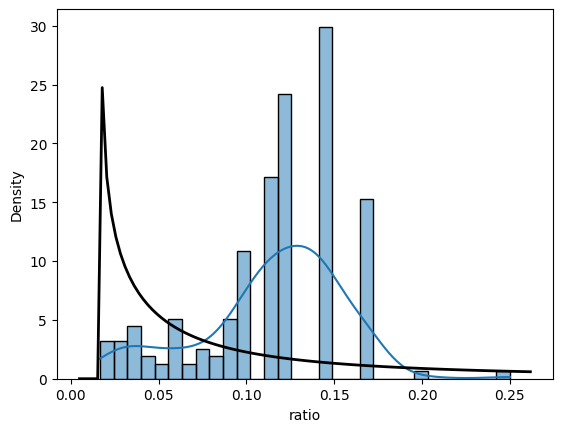

In [89]:
# fit a normal distribution to temp_df["ratio"]

from scipy import stats
import numpy as np

# Get the data
data = temp_df[temp_df["ratio"] > 0]["ratio"]

# Fit a chi-squared distribution to the data
params = stats.f.fit(data)

# Plot the histogram
sns.histplot(data=data, bins=30, kde=True, stat="density")
# Plot the PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.f.pdf(x, *params)
plt.plot(x, p, 'k', linewidth=2)

In [80]:
params

(12512.965870534426,
 10.124527036895302,
 -0.016828953545158648,
 0.10242220210405562)

(0.0, 1.0)

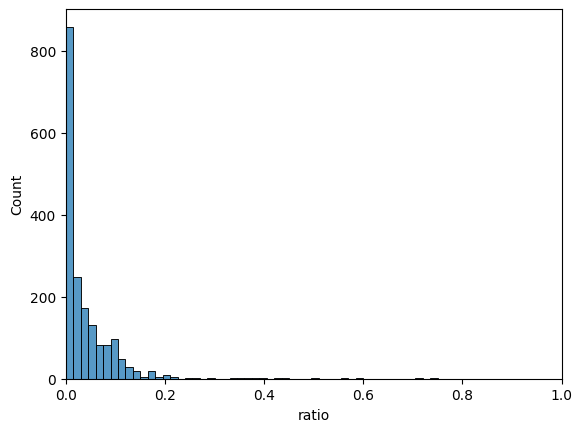

In [27]:
temp_df = df
target = "SUBSTITUTION(TG)"
temp_df["other_count"] = temp_df["consensus_count"] + temp_df["neighbor_count"] - temp_df[target]
temp_df["ratio"] = temp_df[target] / temp_df["other_count"]

sns.histplot(data=temp_df[temp_df["ratio"] > 0], x="ratio", bins=50)
plt.xlim(0, 1)

In [8]:
model.coef_, model.intercept_

(array([0.26591768]), 0.0)

In [45]:
1 - (1 / 0.16243141) ** (1/6)

-0.35380152078573235

In [32]:
0.17460683 / 6

0.029101138333333332

In [35]:
0.08786134 / 6

0.014643556666666667

/tmp/ipykernel_2312/2641431925.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df["pred"] = model.predict(temp_df[["consensus_count"]])


<Axes: xlabel='consensus_count', ylabel='ratio'>

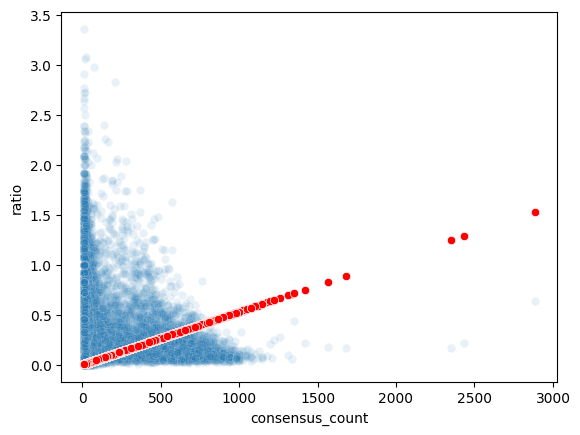

In [28]:
from sklearn.linear_model import LinearRegression, QuantileRegressor

y = temp_df["ratio"]

model = QuantileRegressor(quantile=0.5, alpha=1e-6, fit_intercept=False, solver="highs-ds")
model.fit(temp_df[["consensus_count"]], y)
temp_df["pred"] = model.predict(temp_df[["consensus_count"]])
sns.scatterplot(data=temp_df, x="consensus_count", y=y, alpha=0.1)
sns.scatterplot(data=temp_df, x="consensus_count", y="pred", color='red')

In [261]:
model.coef_, model.intercept_

(array([0.14285714]), 0.0)

In [215]:
0.15384615 / 6

0.025641024999999998

In [176]:
import torch

def lad_pseudo_huber(X, y, delta=0.01, lr=0.1, steps=2000, l2=0.0, use_lbfgs=False, seed=0, standardize=True):
    torch.manual_seed(seed)
    X = torch.as_tensor(X, dtype=torch.float32)
    y = torch.as_tensor(y, dtype=torch.float32).view(-1)

    # Standardize
    if standardize:
        mu = X.mean(0, keepdim=True)
        sigma = X.std(0, keepdim=True) + 1e-12
        Xs = (X - mu) / sigma
    else:
        mu = torch.zeros(1, X.shape[1]); sigma = torch.ones(1, X.shape[1]); Xs = X

    d = X.shape[1]
    b = torch.zeros(d, requires_grad=True)

    def loss_fn():
        r = y - (Xs @ b)
        # pseudo-Huber
        ph = delta**2 * (torch.sqrt(1.0 + (r/delta)**2) - 1.0)
        reg = 0.5 * l2 * (b @ b)
        return ph.mean() + reg

    if use_lbfgs:
        opt = torch.optim.LBFGS([b], max_iter=200, line_search_fn="strong_wolfe")
        def closure():
            opt.zero_grad()
            L = loss_fn()
            L.backward()
            return L
        for _ in range(20):
            opt.step(closure)
    else:
        opt = torch.optim.Adam([b], lr=lr)
        for _ in range(steps):
            opt.zero_grad()
            L = loss_fn()
            L.backward()
            opt.step()

    # De-standardize
    b_unscaled = (b / sigma.squeeze()).detach().numpy()
    return b_unscaled
    return b0_unscaled, b_unscaled

In [177]:
lad_pseudo_huber(temp_df[["Consensus_Count"]].values, temp_df["Error_Count"].values, delta=1.0, lr=0.1, steps=2000, l2=0.0, use_lbfgs=False, seed=0, standardize=True)

array([0.05126309], dtype=float32)

In [114]:
0.125 / 6

0.020833333333333332

In [58]:
import numpy as np

length = [26, 27, 28, 29, 30, 31]
#error_rates = [0.392, 0.407, 0.395, 0.360, 0.362, 0.355, 0.335]
#error_rates = np.array([3.792, 3.528, 3.289, 3.237, 3.148, 2.988, 2.915]) / 100
#error_rates = np.array([2.886, 2.8, 2.747, 2.691, 2.662, 2.642, 2.562]) / 100

#error_rates = [0.0424, 0.0411, 0.0392, 0.0374, 0.0362, 0.0357, 0.0345]
#error_rates = [0.1453, 0.1425, 0.1427, 0.1425, 0.1413, 0.1415, 0.1389]
#error_rates = [0.03491, 0.03277, 0.03089, 0.02991, 0.02943, 0.02927, 0.02847]


#error_rates = [0.04614, 0.04468, 0.04369, 0.04348, 0.04513, 0.04232, 0.04098]
#error_rates = [0.03489, 0.03275, 0.03088, 0.02990, 0.02942, 0.02926, 0.02846]
error_rates = [0.03945, 0.03731, 0.03584, 0.03470, 0.03433, 0.03340]

In [ ]:
length = [26, 27, 28, 29, 30, 31, 32]
error_rates = [0.056078, 0.050887, 0.044705, 0.040459, 0.038092, 0.037517, 0.035722]

In [ ]:
length = [24, 25, 26, 27, 28, 29, 30, 31]
error_rates = [0.03883, 0.03598, 0.03383, 0.03196, 0.03078, 0.02992, 0.02968, 0.02912]

In [19]:
length = [24, 25, 26, 27, 28, 29, 30, 31]
error_rates = [0.1345, 0.1393, 0.1334, 0.1389, 0.1372, 0.1355, 0.1304, 0.1276]

In [1]:
length = [25, 26, 27, 28, 29, 30, 31]
error_rates = [0.003582, 0.003475, 0.003412, 0.003359, 0.003308, 0.003273, 0.003241]

In [2]:
# Linear regression of error_rates ~ length
import numpy as np
from sklearn.linear_model import LinearRegression

X = np.array(length).reshape(-1, 1)
y = np.array(error_rates)
model = LinearRegression()
model.fit(X, y)

model.coef_, model.intercept_

(array([-5.46785714e-05]), 0.004909571428571428)

In [25]:
# Fit against (1 - b * X) ^ (-a)

import scipy.optimize as opt
def model_func(X, a, b):
    return (1 + b * X) ** (-a)  

popt, pcov = opt.curve_fit(model_func, length, error_rates, p0=(1.0, 1.0))
popt

/tmp/ipykernel_1606/2312074680.py:5: RuntimeWarning: invalid value encountered in power
  return (1 + b * X) ** (-a)


array([1.45097978, 0.24750758])

In [24]:
# Use RANSAC regression
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor()
ransac.fit(X, y)
ransac.estimator_.coef_, ransac.estimator_.intercept_

(array([-0.000548]), 0.04548600000000001)

In [47]:
# Use Huber regression
from sklearn.linear_model import HuberRegressor
huber = HuberRegressor()
huber.fit(X, y)
huber.coef_, huber.intercept_

(array([-0.00132606]), 0.07377590513343546)

In [13]:
np.sqrt(0.00137571)

0.037090564837974634

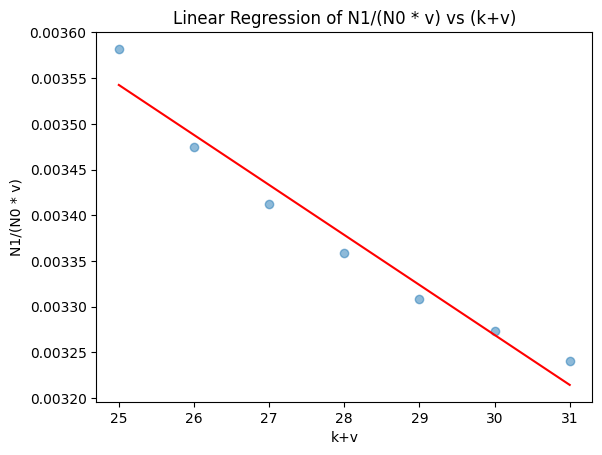

In [21]:
# plot out the regression line
import matplotlib.pyplot as plt
plt.scatter(length, error_rates, alpha=0.5)
plt.plot(length, model.predict(X), color='red')
plt.xlabel('k+v')
plt.ylabel('N1/(N0 * v)')
plt.title('Linear Regression of N1/(N0 * v) vs (k+v)')

plt.show()

In [106]:
model.coef_, model.intercept_

(array([-0.00133929]), 0.07557142857142854)

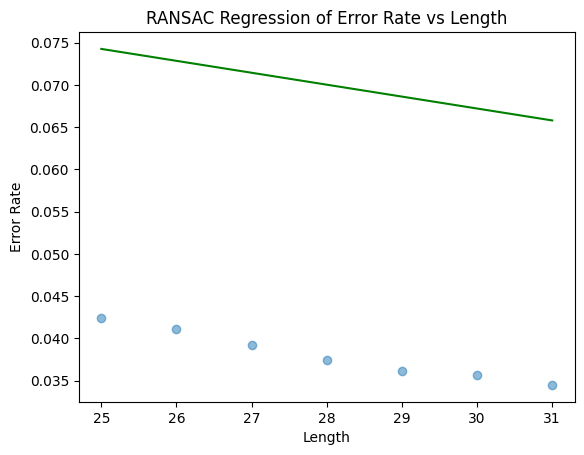

In [107]:
# Plot RANSAC regression line
plt.scatter(length, error_rates, alpha=0.5)
plt.plot(length, ridge.predict(X), color='green')
plt.xlabel('Length')
plt.ylabel('Error Rate')
plt.title('RANSAC Regression of Error Rate vs Length')
plt.show()

In [52]:
# Use ridge regression
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=10.0)
ridge.fit(X, y)
ridge.coef_, ridge.intercept_

(array([-0.00141053]), 0.10952330827067669)

In [51]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.001)
lasso.fit(X, y)
lasso.coef_, lasso.intercept_

(array([-0.00166429]), 0.11662857142857141)

In [70]:
import numpy as np

t = 21
np.exp(0.00137571 / 2 * (t ** 2) - 0.07122999999999999 * t)

0.3034659259898557

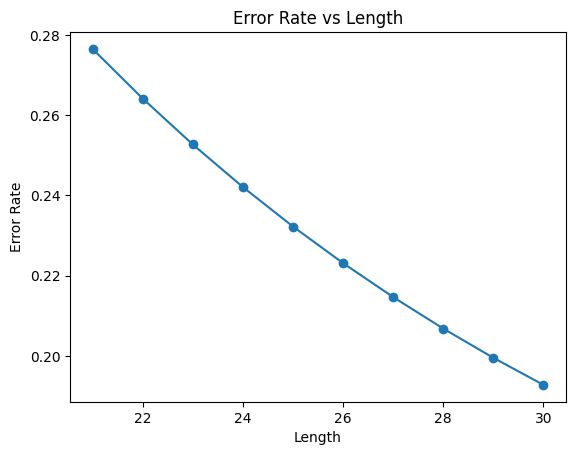

In [63]:
# plot out np.exp(0.00137571 / 2 * (t ** 2) - 0.07122999999999999 * t) 

import matplotlib.pyplot as plt
t_values = np.arange(21, 31)
error_rates = np.exp(0.00141053 / 2 * (t_values ** 2) - 0.07602857142857142 * t_values)
plt.plot(t_values, error_rates, marker='o')
plt.xlabel('Length')
plt.ylabel('Error Rate')
plt.title('Error Rate vs Length')
plt.show()

In [4]:
k_values = [21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
kmer_match_rates = [0.277052, 0.260413, 0.249728, 0.236516, 0.218570, 0.208507, 0.200394, 0.193595, 0.184276, 0.174707, 0.165060]

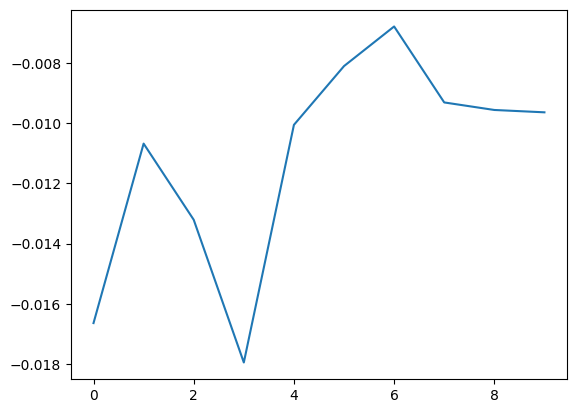

In [27]:
plt.plot(np.diff(kmer_match_rates))

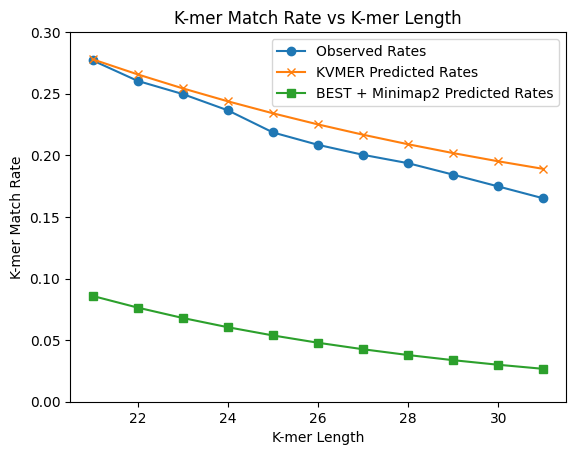

In [18]:
# Plot kmer_match_rates vs k_values
import matplotlib.pyplot as plt

x_values = np.array(k_values)
predicted_rates = np.exp((0.038 ** 2) / 2 * (x_values ** 2) - 0.07613 * x_values)
mash_predicted_rates = np.exp(- 0.1169 * x_values)

plt.plot(k_values, kmer_match_rates, marker='o', label='Observed Rates')
plt.plot(k_values, predicted_rates, marker='x', label='KVMER Predicted Rates')
plt.plot(k_values, mash_predicted_rates, marker='s', label='BEST + Minimap2 Predicted Rates')
plt.xlabel('K-mer Length')
plt.ylabel('K-mer Match Rate')
plt.ylim(0, 0.3)
plt.legend()
plt.title('K-mer Match Rate vs K-mer Length')
plt.show()


In [62]:
# fit a curve to kmer_match_rates vs k_values
import scipy.optimize as opt
def model_func(X, a, b):
    return np.exp((b ** 2) / 2 * (X ** 2) - a * X)

popt, pcov = opt.curve_fit(model_func, k_values, kmer_match_rates, p0=(0.06, 0.02))
popt

array([0.06841139, 0.02590553])

In [22]:
error_rates = np.array(
    [[0, 0.007, 0.204, 0.010],
     [0.009, 0, 0.004, 0.019],
     [0.309, 0.005, 0, 0.008],
     [0.012, 0.015, 0.009, 0]]
)

In [25]:
substitution_rates = np.sum(error_rates)
deletion_rates = np.sum([0.278, 0.201, 0.126, 0.193])
insertion_rates = np.sum([0.249, 0.186, 0.121, 0.185])

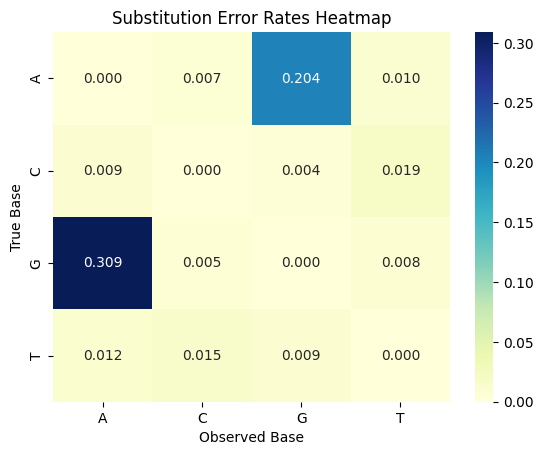

In [ ]:
# Plot error_rates heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(error_rates, annot=True, fmt=".3f", cmap="YlGnBu", xticklabels=['A', 'C', 'G', 'T'], yticklabels=['A', 'C', 'G', 'T'])
plt.xlabel('Observed Base')
plt.ylabel('True Base')
plt.title('Substitution Error Rates Heatmap (%)')
plt.show()

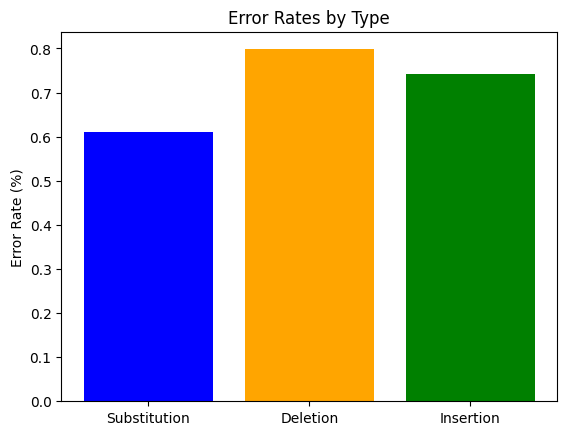

In [28]:
# substitution_rates, deletion_rates, insertion_rates bar plot
import matplotlib.pyplot as plt
labels = ['Substitution', 'Deletion', 'Insertion']
rates = [substitution_rates, deletion_rates, insertion_rates]
plt.bar(labels, rates, color=['blue', 'orange', 'green'])
plt.ylabel('Error Rate (%)')
plt.title('Error Rates by Type')
plt.show()